# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 637


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}&q="

#queryURL = f"{url}appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather ["coord"]["lon"]
        city_max_temp = city_weather ["main"]["temp_max"]
        city_humidity = city_weather ["main"]["humidity"]
        city_clouds = city_weather ["clouds"]["all"]
        city_wind = city_weather ["wind"]["speed"]
        city_country = city_weather ["sys"]["country"]
        city_date = city_weather ["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ancud
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | la ronge
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | magadan
Processing Record 6 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | mogadishu
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | lafia
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | sorong
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | yabelo
Processing Record 19 of Set 1 | rawson
Processing Record 20 of Set 1 | gwadar
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 

Processing Record 36 of Set 4 | chokurdakh
Processing Record 37 of Set 4 | manyana
Processing Record 38 of Set 4 | east london
Processing Record 39 of Set 4 | aden
Processing Record 40 of Set 4 | horodyshche
Processing Record 41 of Set 4 | bosaso
Processing Record 42 of Set 4 | cayenne
Processing Record 43 of Set 4 | itarema
Processing Record 44 of Set 4 | sungaipenuh
Processing Record 45 of Set 4 | castro
Processing Record 46 of Set 4 | pisco
Processing Record 47 of Set 4 | duz
City not found. Skipping...
Processing Record 48 of Set 4 | gold coast
Processing Record 49 of Set 4 | arlit
Processing Record 0 of Set 5 | coquimbo
Processing Record 1 of Set 5 | puerto ayora
Processing Record 2 of Set 5 | aleksandrow kujawski
Processing Record 3 of Set 5 | hofn
Processing Record 4 of Set 5 | el sauzal
Processing Record 5 of Set 5 | ruidoso
Processing Record 6 of Set 5 | rawannawi
City not found. Skipping...
Processing Record 7 of Set 5 | pizarro
Processing Record 8 of Set 5 | vrangel
Processi

Processing Record 26 of Set 8 | iguape
Processing Record 27 of Set 8 | vao
Processing Record 28 of Set 8 | torrington
Processing Record 29 of Set 8 | itaqui
Processing Record 30 of Set 8 | sorland
Processing Record 31 of Set 8 | viamao
Processing Record 32 of Set 8 | napanee
Processing Record 33 of Set 8 | mitu
Processing Record 34 of Set 8 | mnogovershinnyy
Processing Record 35 of Set 8 | vallenar
Processing Record 36 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 37 of Set 8 | nelson bay
Processing Record 38 of Set 8 | manzil bu ruqaybah
City not found. Skipping...
Processing Record 39 of Set 8 | derzhavinsk
Processing Record 40 of Set 8 | manado
Processing Record 41 of Set 8 | yar-sale
Processing Record 42 of Set 8 | huilong
Processing Record 43 of Set 8 | abnub
Processing Record 44 of Set 8 | monatele
City not found. Skipping...
Processing Record 45 of Set 8 | mao
Processing Record 46 of Set 8 | mayo
Processing Record 47 of Set 8 | srednekolymsk
Processing Reco

Processing Record 12 of Set 12 | zhigansk
Processing Record 13 of Set 12 | pandan niog
Processing Record 14 of Set 12 | aksu
Processing Record 15 of Set 12 | biak
Processing Record 16 of Set 12 | xuddur
Processing Record 17 of Set 12 | teacapan
Processing Record 18 of Set 12 | innisfail
Processing Record 19 of Set 12 | diffa
Processing Record 20 of Set 12 | acajutla
Processing Record 21 of Set 12 | kahului
Processing Record 22 of Set 12 | bukama
Processing Record 23 of Set 12 | luanda
Processing Record 24 of Set 12 | kabompo
Processing Record 25 of Set 12 | port arthur
Processing Record 26 of Set 12 | honningsvag
Processing Record 27 of Set 12 | celestun
Processing Record 28 of Set 12 | waddan
Processing Record 29 of Set 12 | merrill
Processing Record 30 of Set 12 | nola
Processing Record 31 of Set 12 | the pas
Processing Record 32 of Set 12 | sakakah
Processing Record 33 of Set 12 | russell
Processing Record 34 of Set 12 | yei
Processing Record 35 of Set 12 | mayumba
Processing Record

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ancud,-41.8697,-73.8203,51.21,71,95,10.36,CL,1681692028
1,mataura,-46.1927,168.8643,65.82,49,96,3.22,NZ,1681692029
2,la ronge,55.1001,-105.2842,55.65,24,20,9.22,CA,1681692030
3,avarua,-21.2078,-159.7750,75.25,53,100,5.75,CK,1681692030
4,magadan,59.5667,150.8000,33.53,87,73,4.23,RU,1681692031


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ancud,-41.8697,-73.8203,51.21,71,95,10.36,CL,1681692028
1,mataura,-46.1927,168.8643,65.82,49,96,3.22,NZ,1681692029
2,la ronge,55.1001,-105.2842,55.65,24,20,9.22,CA,1681692030
3,avarua,-21.2078,-159.7750,75.25,53,100,5.75,CK,1681692030
4,magadan,59.5667,150.8000,33.53,87,73,4.23,RU,1681692031


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

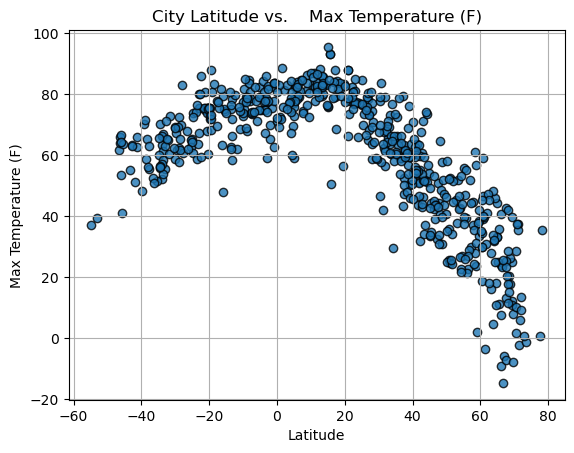

In [8]:
# Build scatter plot for latitude vs. temperature
#Create scatterplot function
def scatter_plot(x_values, y_values, xlabel, ylabel, title, filename):
    plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.savefig(f"output_data/{filename}.png")
    plt.show()
    
    
# Incorporate the other graph properties
# Build scatter plot for latitude vs. temp
scatter_plot(city_data_df["Lat"], city_data_df["Max Temp"], "Latitude", "Max Temperature (F)", "City Latitude vs.\
    Max Temperature (F)", "Fig1")

# Save the figure - saved in function above
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

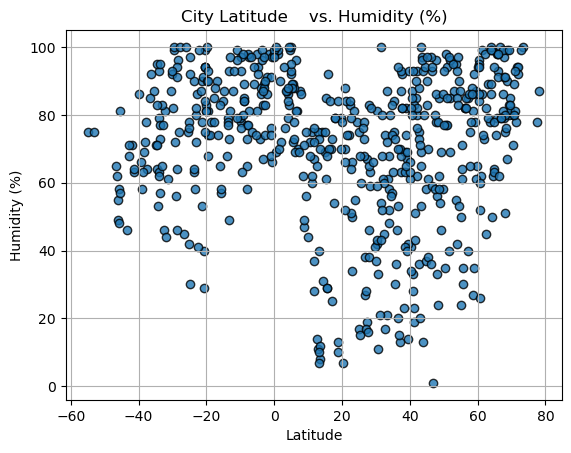

In [9]:
# Build the scatter plots for latitude vs. humidity
# Incorporate teh other graph prperties
scatter_plot(city_data_df["Lat"], city_data_df["Humidity"], "Latitude", "Humidity (%)", "City Latitude\
    vs. Humidity (%)", "Fig2")

# Save the figure - saved in function
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

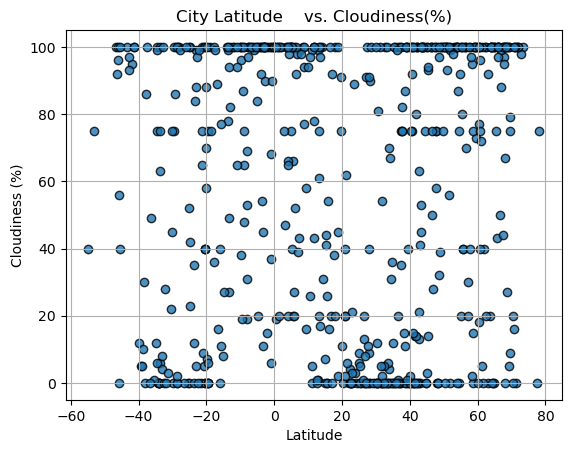

In [10]:
# Build the scatter plots for latitude vs. cloudiness
#Incorporate teh other graph properties
scatter_plot(city_data_df["Lat"], city_data_df["Cloudiness"], "Latitude", "Cloudiness (%)", "City Latitude\
    vs. Cloudiness(%)", "Fig3")


# Save the figure - saved in function
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

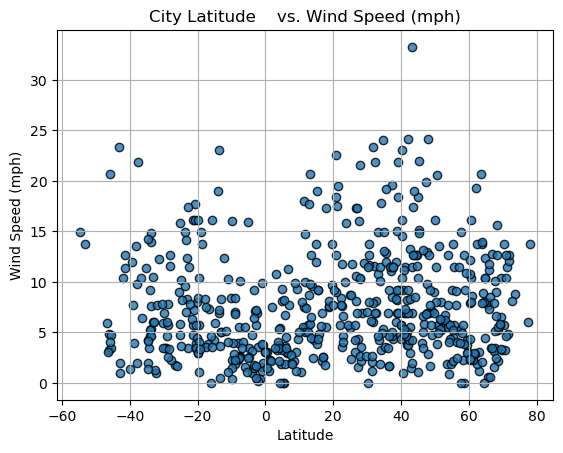

In [11]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
scatter_plot(city_data_df["Lat"], city_data_df["Wind Speed"], "Latitude", "Wind Speed (mph)", "City Latitude\
    vs. Wind Speed (mph)", "Fig4")

# Save the figure - saved in function
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print (f"The r-squared is: {rvalue**2}")
    plt.show()
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,la ronge,55.1001,-105.2842,55.65,24,20,9.22,CA,1681692030
4,magadan,59.5667,150.8000,33.53,87,73,4.23,RU,1681692031
5,kapaa,22.0752,-159.3190,82.38,74,0,5.75,US,1681692031
6,mogadishu,2.0371,45.3438,81.36,72,100,7.52,SO,1681692031
7,ponta do sol,32.6667,-17.1000,65.71,74,100,8.10,PT,1681692031


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ancud,-41.8697,-73.8203,51.21,71,95,10.36,CL,1681692028
1,mataura,-46.1927,168.8643,65.82,49,96,3.22,NZ,1681692029
3,avarua,-21.2078,-159.7750,75.25,53,100,5.75,CK,1681692030
8,bluff,-46.6000,168.3333,61.54,65,100,5.91,NZ,1681692031
11,hermanus,-34.4187,19.2345,55.80,53,0,3.42,ZA,1681692035


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7550191169119462


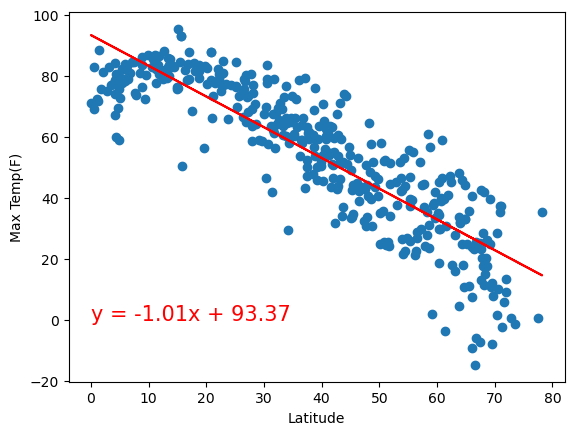

In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp(F)", (0,0))

The r-squared is: 0.4709695330211404


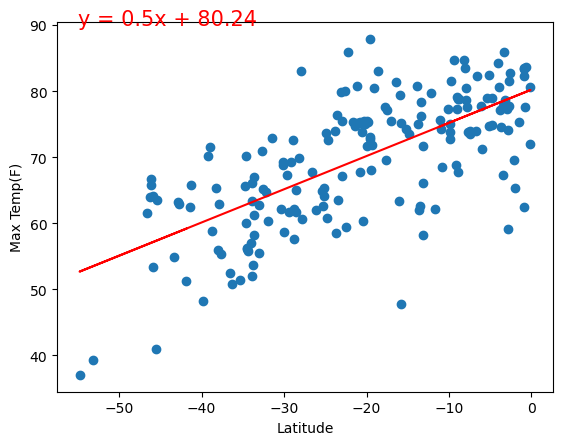

In [16]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp(F)", (-55, 90))

**Discussion about the linear relationship:**

The linear regression for teh temperature vs. latitude show a stron correlation between them, especially in the Northern Hemisphere. The r-squared value for the Northern Hemisphere is high, which indicates a strong negative correlation between latitude and temperature. As the latitude increases(moving away from the equator), the temperature decreases. This is expected, as temperatures are generally warmer near the equator and cooler towards the poles. 


In the Southern Hemisphere, there is a positive correlation between latitude and temperature, but the correlation may not be as strong as in the Northern Hemisphere. As the latitutde increases, (moving closer to the equator), the temperture increases. This relationship is expected as well, as the tempertures are generally warmer near the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.03631269233047206


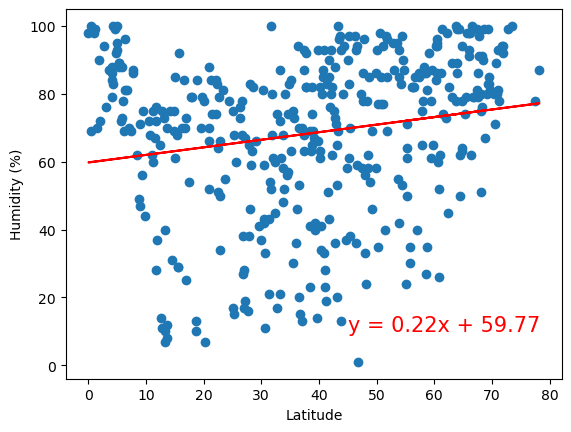

In [17]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity (%)", (45, 10))

The r-squared is: 0.14089119440623163


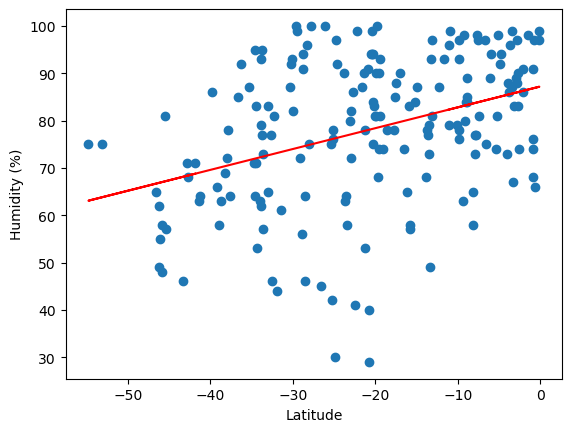

In [18]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity (%)", (-55, 15))

**Discussion about the linear relationship:** 

There is a weaker correlation compared to the temp vs. latitude plots. The r-squared values for both hemispheres are relatively low, which indicates that the relationship between humidity and latitude is not very strong. However, we can still observe some patterns. In the Northern Hemisphere, there is a slight positive correlation between latitude and humidity, which means that as we move away from the equator, humidity tends to increase slightly. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0248597877074377


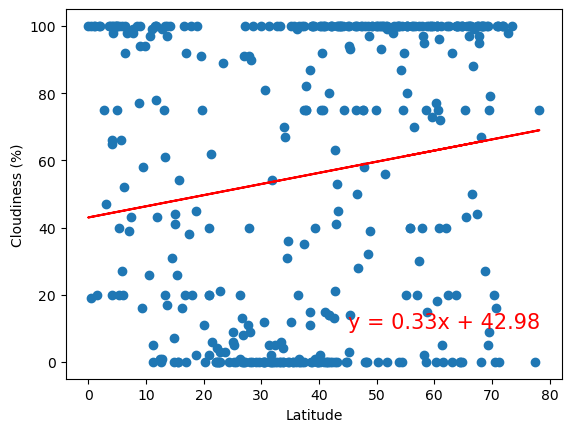

In [19]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness (%)", (45, 10))

The r-squared is: 0.0660246855638648


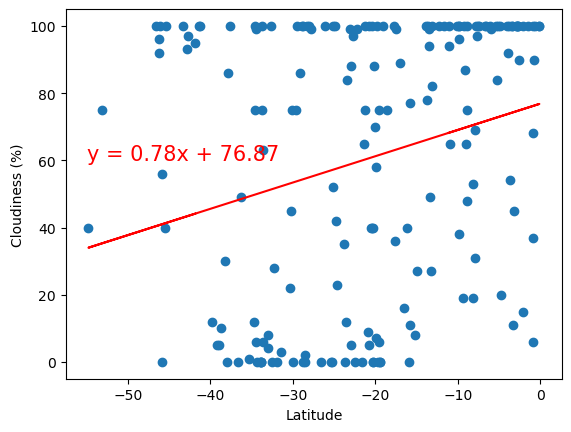

In [20]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness (%)", (-55, 60))

**Discussion about the linear relationship:** 

The linear regression plots for Cloudiness vs. Latitude show weak correlations between them in both hemispheres. The r-squared values are low, which suggests that there is no strong relationship between cloudiness and latitude. The data points are quite scattered in both plots, which means that the cloudiness does not have a clear pattern based on latitude. This might be because cloudiness is more influenced by local weather systems, topography, and other factors that are not directly related to latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0044583452058155225


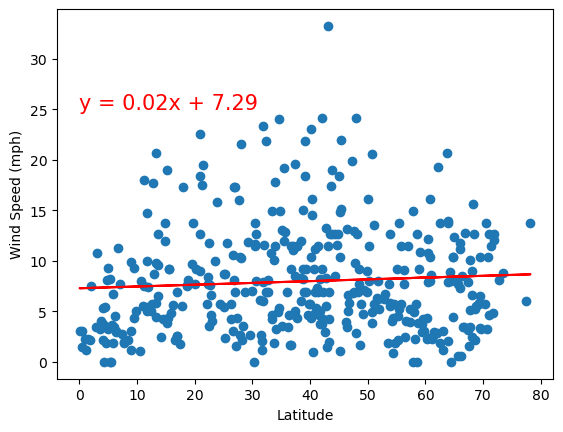

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed (mph)", (0, 25))

The r-squared is: 0.07654378495256028


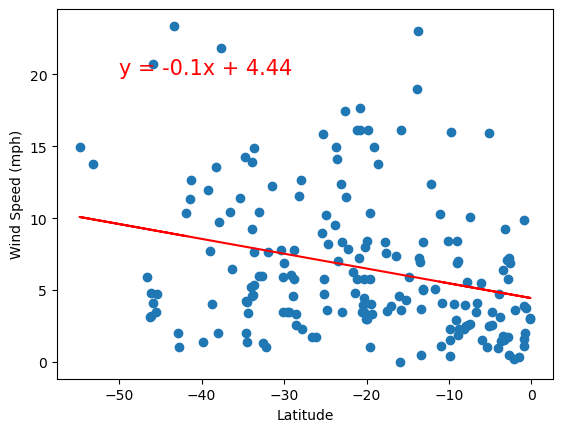

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed (mph)", (-50, 20))

**Discussion about the linear relationship:** 

The linear regression plots for Wind Speed vs. Latitude also show weak correlation between these two variables in both hemispheres. The r-squared values are low, indicating that there is no strong relationship between wind speed and latitude. The data points in both plots are dispersed, sugggesting that wind speed does not have a clear pattern based on latitude. This could be due to various factors, such as local geography, pressure systems, and other factors that influence wind speed more than latitude. 

In conclusion, the strongest correlation observed is between temperature and latitude, with a  clear pattern of temperatures decreasing as we move away from the equator. The other weather variables(humidity, cloudiness, and wind speed)show weaker correlations with latitude, suggesting that these variables are influenced more by local and regional factors than by latitude alone. 